In [1]:
import pandas as pd
import sklearn
import numpy

In [4]:
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#drop nois columns
data_clean=data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
X_raw=data_clean.drop('Survived', axis=1)
y=data_clean['Survived']

In [9]:
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [10]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [12]:
X_test=pd.read_csv('test.csv')
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
X_raw.groupby(['Pclass', 'Sex']).Age.mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [29]:
X_raw.groupby(['Pclass', 'Sex']).Age.median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [18]:
X_raw.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [20]:
X_test[X_test['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [30]:
X_test[(X_test['Pclass']==1) & (X_test['Sex']=='female')]['Age'].fillna(35, inplace=True)

/var/folders/2t/2knlq2k54f3dcz1hvb8vbw9m0000gq/T/ipykernel_77455/631693528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[(X_test['Pclass']==1) & (X_test['Sex']=='female')]['Age'].fillna(35, inplace=True)


In [31]:
X_test.iloc[22]

PassengerId                                     914
Pclass                                            1
Name           Flegenheim, Mrs. Alfred (Antoinette)
Sex                                          female
Age                                             NaN
SibSp                                             0
Parch                                             0
Ticket                                     PC 17598
Fare                                        31.6833
Cabin                                           NaN
Embarked                                          S
Name: 22, dtype: object

In [32]:
X_raw['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
X_raw['Embarked']=X_raw['Embarked'].fillna('S')
X_test_changed=X_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
X_test_changed['Embarked']=X_test_changed['Embarked'].fillna('S')

In [34]:
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [46]:
from sklearn.impute import SimpleImputer

my_imputer=SimpleImputer(strategy='median')

X_raw[['Age', 'Fare']]=my_imputer.fit_transform(X_raw[['Age', 'Fare']])

X_test_changed[['Age', 'Fare']]=my_imputer.transform(X_test_changed[['Age','Fare']])

In [47]:
X_test_changed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [61]:
from sklearn.preprocessing import OneHotEncoder

my_ohe=OneHotEncoder(handle_unknown='ignore', sparse='False')
ohe_X_raw=pd.DataFrame(my_ohe.fit_transform(X_raw[['Sex', 'Embarked']]))
ohe_X_test=pd.DataFrame(my_ohe.transform(X_test_changed[['Sex', 'Embarked']]))

ohe_X_raw.index=X_raw.index
ohe_X_test.index=X_test_changed.index

X_raw_=pd.concat([X_raw.drop(['Sex', 'Embarked'], axis=1), ohe_X_raw], axis=1)
X_test_changed_=pd.concat([X_test_changed.drop(['Sex', 'Embarked'], axis=1), ohe_X_test], axis=1)

In [62]:
X_raw_.head()

,Pclass,Age,SibSp,Parch,Fare,0
0,3,22.0,1,0,7.2500,"(0, 1)\t1.0\n (0, 4)\t1.0"
1,1,38.0,1,0,71.2833,"(0, 0)\t1.0\n (0, 2)\t1.0"
2,3,26.0,0,0,7.9250,"(0, 0)\t1.0\n (0, 4)\t1.0"
3,1,35.0,1,0,53.1000,"(0, 0)\t1.0\n (0, 4)\t1.0"
4,3,35.0,0,0,8.0500,"(0, 1)\t1.0\n (0, 4)\t1.0"


In [68]:
#Categorical fetures encodong

In [65]:
ohe_X_raw=pd.get_dummies(X_raw[['Sex', 'Embarked']])
ohe_X_test=pd.get_dummies(X_test_changed[['Sex', 'Embarked']])

X_raw_=pd.concat([X_raw.drop(['Sex', 'Embarked'], axis=1), ohe_X_raw], axis=1)
X_test_changed_=pd.concat([X_test_changed.drop(['Sex', 'Embarked'], axis=1), ohe_X_test], axis=1)

In [66]:
X_raw_.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [67]:
X_test_changed_.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [72]:
from sklearn.preprocessing import StandardScaler

my_scaler= StandardScaler()
X_raw_[['Age', 'Fare']]=my_scaler.fit_transform(X_raw_[['Age', 'Fare']])
X_test_changed_[['Age', 'Fare']]=my_scaler.transform(X_test_changed_[['Age', 'Fare']])

In [73]:
X_raw_.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,-0.565736,1,0,-0.502445,0,1,0,0,1
1,1,0.663861,1,0,0.786845,1,0,1,0,0
2,3,-0.258337,0,0,-0.488854,1,0,0,0,1
3,1,0.433312,1,0,0.420730,1,0,0,0,1
4,3,0.433312,0,0,-0.486337,0,1,0,0,1


In [74]:
X_raw_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_female  891 non-null    uint8  
 6   Sex_male    891 non-null    uint8  
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


In [75]:
X=X_raw_.copy()
X_test_last=X_test_changed_.copy()

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid=train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape, X_valid.shape, y_train.shape)

(668, 10) (223, 10) (668,)


## Neural model

In [78]:
from tensorflow import keras
from tensorflow.keras import layers

model_NM = keras.Sequential([
    layers.Dense(20, activation='relu', input_shape=[10]),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(20, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])

model_NM.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

model_NM_info = model_NM.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

2022-09-08 12:03:43.857556: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Best Validation Loss: 0.4091
Best Validation Accuracy: 0.8386


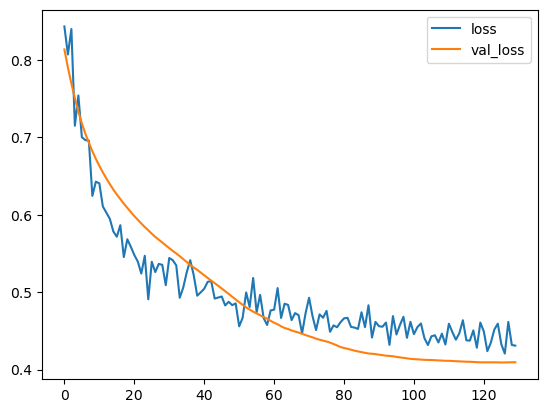

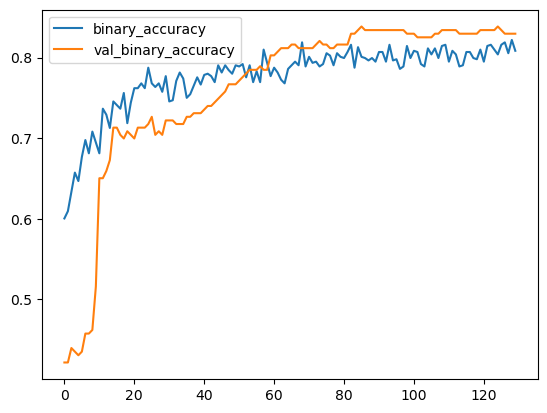

In [80]:
history_df = pd.DataFrame(model_NM_info.history)
# Start the plot at epoch 5
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

In [81]:
from sklearn.metrics import accuracy_score 

In [93]:
predictions=model_NM.predict(X_valid)
for i in predictions:
    if i[0]<0.5:
        i[0]=0
    else:
        i[0]=1

7/7 [==============================] - 0s 726us/step


In [94]:
predictions

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],

In [95]:
result_NM=accuracy_score(predictions, y_valid)
result_NM

0.8340807174887892

In [96]:
gender_submission=pd.read_csv('gender_submission.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [99]:
test_predictions=model_NM.predict(X_test_last)
for i in test_predictions:
    if i[0]<0.5:
        i[0]=0
    else:
        i[0]=1

14/14 [==============================] - 0s 480us/step


In [101]:
gender_submission['Survived']=test_predictions.astype('int64')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [102]:
gender_submission.to_csv('my_submission_1_nm', index=False)

In [103]:
# Result: 0.76794

## Random forest classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(X_train, y_train)
result_rf=accuracy_score(model_rf.predict(X_valid), y_valid)
result_rf

0.7802690582959642

## Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()
model_LR.fit(X_train, y_train)
result_LR=accuracy_score(model_LR.predict(X_valid), y_valid)
result_LR

0.8071748878923767

In [108]:
gender_submission['Survived']=model_LR.predict(X_test_last)
gender_submission.to_csv('my_submission_2_lr', index=False)

In [109]:
# Result: 0.76555

## Without Age

In [110]:
X_train_new=X_train.drop('Age', axis=1)
X_valid_new=X_valid.drop('Age', axis=1)
X_test_new=X_test_last.drop('Age', axis=1)

In [111]:
X_valid_new.head()

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
709,3,1,1,-0.341452,0,1,1,0,0
439,2,0,0,-0.437007,0,1,0,0,1
840,3,0,0,-0.488854,0,1,0,0,1
720,2,0,1,0.016023,1,0,0,0,1
39,3,1,0,-0.422074,1,0,1,0,0


In [113]:
model_NM_2 = keras.Sequential([
    layers.Dense(20, activation='relu', input_shape=[9]),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(20, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])

model_NM_2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

model_NM_info_2 = model_NM_2.fit(
    X_train_new, y_train,
    validation_data=(X_valid_new, y_valid),
    batch_size=256,
    epochs=200,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

Best Validation Loss: 0.4306
Best Validation Accuracy: 0.8117


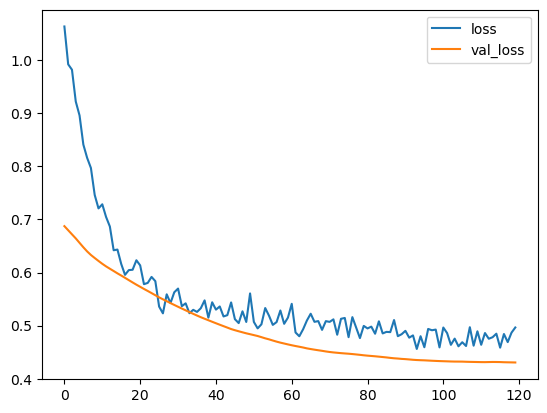

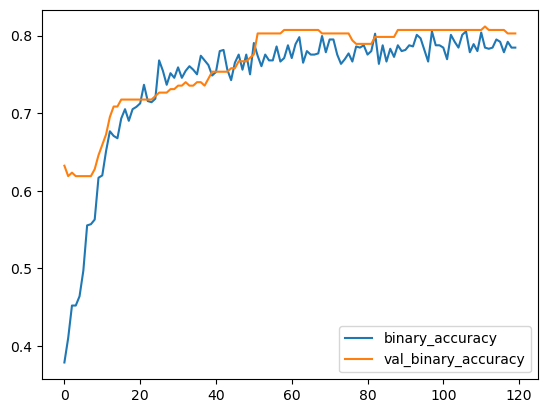

In [114]:
history_df_2 = pd.DataFrame(model_NM_info_2.history)
# Start the plot at epoch 5
history_df_2.loc[:, ['loss', 'val_loss']].plot()
history_df_2.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df_2['val_loss'].min(), 
              history_df_2['val_binary_accuracy'].max()))

In [115]:
predictions_2=model_NM_2.predict(X_valid_new)
for i in predictions_2:
    if i[0]<0.5:
        i[0]=0
    else:
        i[0]=1

result_NM_2=accuracy_score(predictions_2, y_valid)
result_NM_2

7/7 [==============================] - 0s 572us/step


0.8071748878923767